# Final Assignment for the course of Fundamentals of Data Visualization

## 1. Introduction

### 1.1 Background and Goals
I choose a dataset named “Dog breeds ranked” from Kaggle. The key attributes include breed name, type, size, intelligence, longevity, costs, ailments, popularity, and grooming frequency. The type indicates the category the breed belongs to, such as terrier, sporting, working, or non-sporting. The costs include purchase price, food costs per year, and lifetime cost.

Based on the dataset, I have two goals:

1.Generalize knowledge about specific types of dogs. For example, can I form a general impression for terriers (for example, in terms of size, intelligence, costs, popularity, ailments, and suitability for children)?

2.Help to choose a breed for an owner. For example, if an owner has limited budget and time, which breeds best fit?

### 1.2 Related work
There are already several notebooks posted. One coder chose his future breed dog by scoring different breeds under a series of criteria including size, intelligence, costs, popularity, ailments, and suitability for children. According to his preferences, scores are assigned to different breeds so that the breed of the highest score can be chosen. This work suits well under special preferences, but general impressions on the dog types cannot be derived from the output. Moreover, the final score doesn’t provide details about the candidates. Breeds with close scores may differ significantly in attributes like types, costs, and genetic ailments.

Hence, in the following work, I plan to make the following improvements:

1.Utilize data visualization to show the characteristics of different types of dog breeds more intuitively. 

2.Provide associated details as trade-offs in addition to final scores.

## 2. Data Input, Inspection, and Rescaling

### 2.1 Inport libraries

The libraries needed in this work are pandas, sklearn, and altair

In [1]:
# Import libaries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import altair as alt

### 2.2 Input data

 The csv.file has been downloaded from Kaggle to the same folder of the nootbook.
(https://www.kaggle.com/datasets/jainaru/dog-breeds-ranking-best-to-worst/data)

In [2]:
# Input data
data = pd.read_csv("dogs-ranking-dataset.csv")

### 2.3 Inspecting data

Inspect the data by the following function.

In [3]:
# Define a function for inspecting data
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(data)

data shape: (87, 19)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Breed,object,0,0.0,0,87,87,NaN,NaN,NaN,NaN,Border Terrier,Cairn Terrier,Siberian Husky
type,object,0,0.0,0,7,87,NaN,NaN,NaN,NaN,terrier,terrier,working
score,float64,0,0.0,0,71,87,0.99,3.64,2.603678,0.570288,3.61,3.53,3.22
popularity ranking,int64,0,0.0,0,87,87,1.0,87.0,44.0,25.258662,61,48,16
size,int64,0,0.0,0,3,87,1.0,3.0,1.954023,0.819927,1,1,2
intelligence,object,0,0.0,0,6,87,NaN,NaN,NaN,NaN,Above average,Above average,Average
congential ailments,object,0,0.0,0,47,87,NaN,NaN,NaN,NaN,none,"'lion jaw', heart problems",none
score for kids,float64,0,0.0,0,71,87,1.86,4.99,3.681839,0.655736,4.99,4.91,4.72
size.1,object,0,0.0,0,3,87,NaN,NaN,NaN,NaN,small,small,medium
$LIFETIME COST,object,0,0.0,0,87,87,NaN,NaN,NaN,NaN,"$22,638","$21,992","$22,049"


After inspecting the data, I need to do the following:

(1) Selecting key attributes relating to our goals.

(2) Transform string variables to float variables.

(3) Rescaling float variables to range [0,1].

### 2.4 Selecting attributes and Rescaling data

In [4]:
# Choose key attributes
columns = [ "Breed", 
           'type', 'popularity ranking', 'size', 'score for kids', '$LIFETIME COST', 
           'INTELLIGENCE %', 'LONGEVITY(YEARS)', 'NUMBER OF GENETIC AILMENTS', 'GROOMING FREQUNCY'
          ]
df = data[columns]

In the last, a weighted score is calculated for recommending dog breed. Hence, the key attributes should be numerized.

In [5]:
# Covert strings to floats
for col in ['$LIFETIME COST']:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)
df["INTELLIGENCE %"] = df["INTELLIGENCE %"].replace('%', '', regex=True).astype(float) / 100

<ipython-input-5-4dbfebfdcc84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-5-4dbfebfdcc84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["INTELLIGENCE %"] = df["INTELLIGENCE %"].replace('%', '', regex=True).astype(float) / 100


In [6]:
# Convert Nominal Values to Numerical Values
label_encoder = LabelEncoder()
df['grooming_freq'] = label_encoder.fit_transform(df['GROOMING FREQUNCY'])
df = df.drop('GROOMING FREQUNCY', axis=1)

<ipython-input-6-fe3a0d91c5b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grooming_freq'] = label_encoder.fit_transform(df['GROOMING FREQUNCY'])


In [7]:
# Rescale numberical data to range [0,1]
scaler = MinMaxScaler()
column_to_scale = ['popularity ranking','size','score for kids','$LIFETIME COST', 
                   'LONGEVITY(YEARS)','NUMBER OF GENETIC AILMENTS','grooming_freq'
                  ]
df[column_to_scale] = scaler.fit_transform(df[column_to_scale])

In [8]:
# Call the function to inspect the final dataframe
summary(df)

data shape: (87, 10)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Breed,object,0,0.0,0,87,87,NaN,NaN,NaN,NaN,Border Terrier,Cairn Terrier,Siberian Husky
type,object,0,0.0,0,7,87,NaN,NaN,NaN,NaN,terrier,terrier,working
popularity ranking,float64,0,0.0,0,87,87,0.0,1.0,0.5,0.293705,0.697674,0.546512,0.174419
size,float64,0,0.0,0,3,87,0.0,1.0,0.477011,0.409963,0.0,0.0,0.5
score for kids,float64,0,0.0,0,71,87,0.0,1.0,0.582057,0.2095,1.0,0.974441,0.913738
$LIFETIME COST,float64,0,0.0,0,87,87,0.0,1.0,0.484352,0.226302,0.693496,0.644582,0.648898
INTELLIGENCE %,float64,0,0.0,0,67,87,0.01,1.0,0.502069,0.290377,0.7,0.61,0.45
LONGEVITY(YEARS),float64,0,0.0,0,83,87,0.0,1.0,0.47284,0.189859,0.755142,0.739471,0.616063
NUMBER OF GENETIC AILMENTS,float64,0,0.0,0,8,87,0.0,1.0,0.187739,0.189678,0.0,0.222222,0.0
grooming_freq,float64,0,0.0,0,3,87,0.0,1.0,0.396552,0.230494,0.5,0.5,1.0


We can see that the data frame is ready for analysis.

## 3. Design

The tasks corresponding to my goals are:

Goal 1. Generalizing knowledge about specific types of dogs:

1. Goal: People form general impressions of dog categories.
2. Means: Explore data to assess the characteristics of different types of dogs.
3. Characteristics: Navigate between overview levels to form general impressions in terms of size, intelligence, longevity, costs, popularity, ailments, and suitability for children.
4. Target Data: Use the outcomes to form general knowledge between different types of dog breeds.
5. Workflow: This task is performed during the initial exploration phase.
6. Roles: Executed by data analysts or dog enthusiasts and advisors.

Goal 2. Choosing a dog breed:

1. Goal: People choose future breed dog according to their preferences.
2. Means: Explore data to access best-fit dog between different dog breeds.
3. Characteristics: Assign weighted scores according to predetermined preferences to find suitable candidates and further understand trade-offs between the candidates.
4. Target Data: Evaluate the candidates and choose a future breed dog.
5. Workflow: This task is performed during the decision-making phase.
6. Roles: Executed by potential dog owners or advisors.

According to the goals and tasks, four low-fidelity prototypes are draw.

1. Prototype 1. 

Analyze the popularity rankings with respect to dog types for getting a general impression of people's preferences. The prototype is designed by connecting two bar charts. The left is average popularity rankings with respect to types, then the right chart gives the detailed rankings within one type.

In addition, a scatter point chart is drawn with x-axis representing the types and y-axis representing popularity rankings. The data points are different dog breeds organized according to their types. The chart helps to show the spread of the popularity rankings of different types of dog breeds.

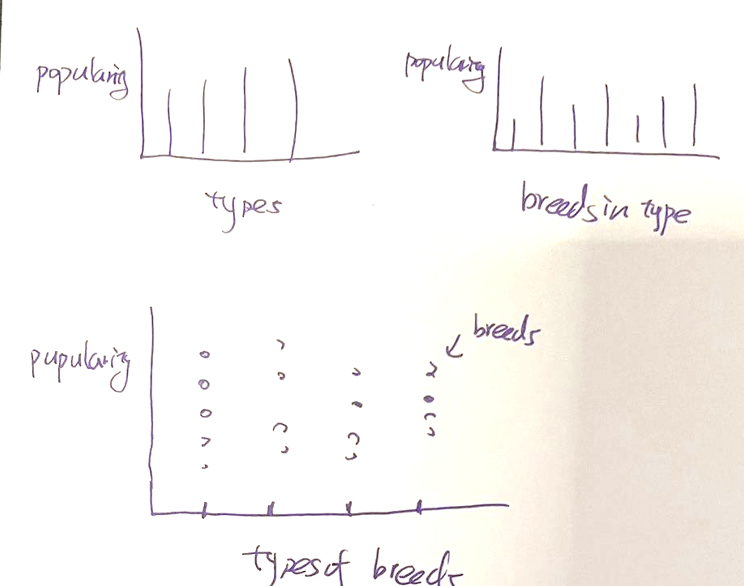

2. Prototype 2.

Analyze the correlation between key attributes by drawing a correlation matrix. This is a general analysis for all the data points, i.e., specific types of dogs are temporarily dropped to analyze if there exist general trends.

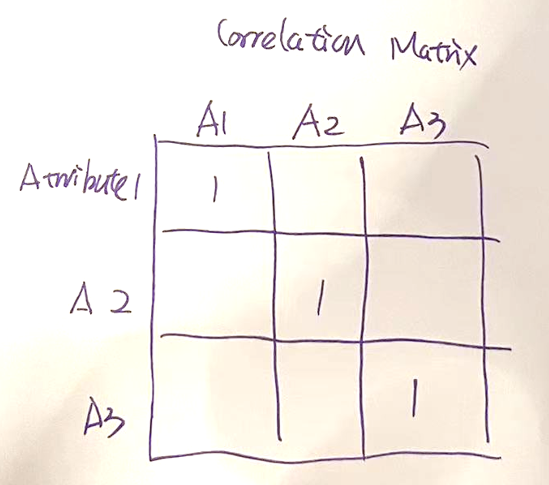

3. Prototype 3.

Analyze the correlation between key attributes with a specific types of dog breeds. Charts of correlation matrices are draw for different types. This helps to obtain genearal improssions for a certain type of dog breed.

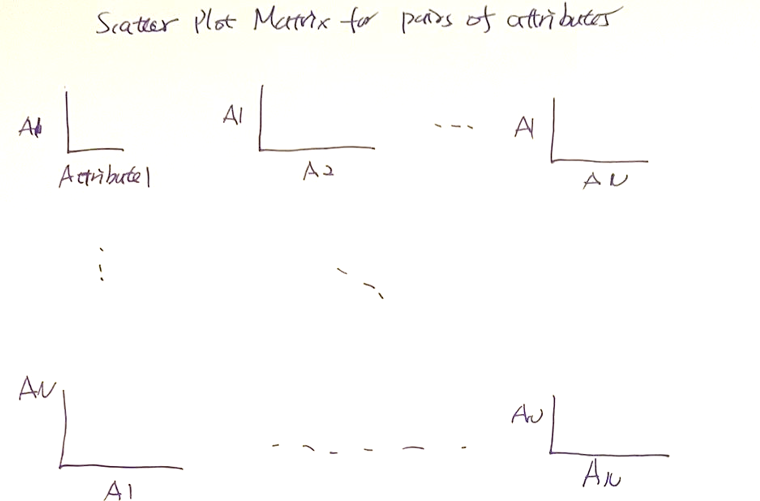

4. Prototype 4.
This prototype is to visualize weighted scores and scores from different attributes, which help to choose a future dog by compare and evaluating trade-offs between different candidates. Two bar charts are draw. The upper bar chart shows the sorces of the candidates, and the lower stocked bar chart shows the scores contributed from each attribute.

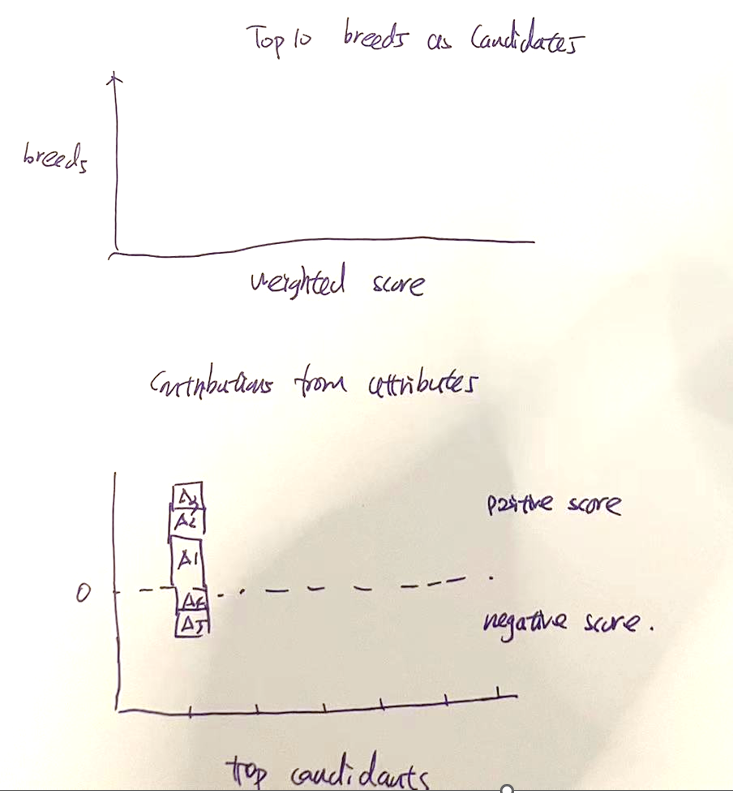

The next step is to implement the analysis by coding and visualizations.

## 4. Goal 1: Generaizing knowledge about different types of dog breeds

First, we want to show the general popularity of the different types by using semantic zooming. In the chart below, we will aggregate or disaggregate dog breeds based on their types.

In [9]:
# Let's implement filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["type"])

# Create a container for our two different views
#base =  alt.Chart(data).properties(width=500, height=250) # the size for the two charts (overview+detail)

# Let's specify our overview chart
overview = alt.Chart(data).mark_bar().encode(
    y = "mean(popularity ranking)",
    x = alt.X(field='type', type='nominal', sort=alt.EncodingSortField(field='popularity ranking', op='mean')),
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# selection: This is the condition being checked.
# alt.value("orange"): This sets the color for the selected data points to orange.
# alt.value("lightgrey"): This sets the color for the unselected data points to light grey

# Create a detail chart
detail = alt.Chart(data).mark_bar().encode(
    y = "popularity ranking", 
    x = "Breed"
).transform_filter(selection).properties(height=250, width=250)

# transform_filter(selection): This applies a filter to the data based on the selection condition. Only the data points that meet the selection criteria will be included in the chart.

overview | detail

alt.HConcatChart(...)

From above, we can derive two observations. 
1. In terms of decreasing average popularity, the types are sequenced as working, toy, non-sporting, herding, sporting, hound, and terrier.
2. Howver, there exists at least one breed with high ranking in every type. For example, although terrier is less popular, the breed staffordshire bull terrier is among the top 20 most popular breed.
To show the variation range in popularity ranking, the following char is added.

In [10]:
# Create the point chart
popularity_type = alt.Chart(data).mark_point().encode(
    x=alt.X('type:N', title='Type of Breed'),
    y=alt.Y('popularity ranking:Q', title='Popularity Ranking'),
    color='type:N',
    tooltip=['Breed', 'popularity ranking']
).properties(
    title='Dog Breeds Popularity by Type',
    width=600,
    height=400
)
popularity_type

alt.Chart(...)

From the above two charts, we can conclude that:
There is no evidence showing that a specific type of dog breeds has consistent ranking in popularity.Therefore, there is no "safe" type to choose, and we should evaluate each type further. But before diving to specific type, I examine if there exist general trend on dog breeds.

In [11]:
# Calculate the correlation matrix
corr = df.corr().reset_index().melt('index')

# Rename columns for better readability
corr.columns = ['Variable1', 'Variable2', 'Correlation']

# Create the heatmap
heatmap = alt.Chart(corr).mark_rect().encode(
    x='Variable1:O',
    y='Variable2:O',
    color=alt.Color('Correlation:Q', 
                    scale=alt.Scale(scheme='redblue', domain=[-1, 0, 1], range=['green', 'white', 'red'])
                   ),
    tooltip=['Variable1', 'Variable2', 'Correlation']
).properties(
    width=400,
    height=400,
    title='Correlation Matrix'
)

# Add text to show correlation values
text = heatmap.mark_text(baseline='middle').encode(
    text=alt.Text('Correlation:Q', format='.2f'),
    color=alt.condition(
        alt.datum.Correlation > 0.5, 
        alt.value('black'), 
        alt.value('white')
    )
)

# Combine heatmap and text
final_chart = heatmap + text

# Display the heatmap
final_chart.display()

alt.LayerChart(...)

The general rules to evaluate correlations are:
1. 0.00 to 0.10: Negligible correlation
2. 0.10 to 0.39: Weak correlation
3. 0.40 to 0.69: Moderate correlation
4. 0.70 to 0.89: Strong correlation
5. 0.90 to 1.00: Very strong correlation

Based on the rules, I have the following observations:
1. Lifetime cost is strongly related to longevity (and vice versa), and moderately related to the score for kids (and vice versa).
2. Size is negatively moderately related to longevity (and vice versa). 
3. Popularity ranking is negatively moderately related to the number of genetic ailments (and vice versa).
4. Except the above relationships, other pairs of correlations are weak or negligible. For example, there is no general trend indicating that the size of a breed influences its popularity.

Next, for diving into dog breeds within one type, SPLOM (scatter plot matrix) is utilized to analyze the possible correlation between size, intelligence, costs, ailments, popularity, and grooming frequency.

In [12]:
# Build a SPLOM(Scatter Plot Matrix)

options =['ALL']+df["type"].unique().tolist()
dropdown = alt.binding_select (options=options, name="Select a type:")
# dropdown = alt.binding_select (options=data["type"].unique(), name="Select a type:")
selection = alt.selection(type='single', fields=['type'], bind=dropdown, empty='none')
# selection = alt.selection(type='multi', fields=['type'], bind='legend')

alt.Chart(df).mark_circle().encode(
    alt.X(alt.repeat("column"), type="quantitative"),
    alt.Y(alt.repeat("row"), type="quantitative"),
    color=alt.condition(
        selection,
        alt.value('red'),
        alt.Color("type:N", scale=alt.Scale(scheme='spectral'))
    ),  # This line encodes the color of the scatter plot points based on the Happiness Score variable
    # The double quotes are used to specify the name of the field (or column) in the dataset
    tooltip=["Breed", "type"],
    opacity=alt.condition(selection, alt.value(1),alt.value(.2))
).properties(
    width=125,
    height=125
).repeat(
    row=["size", "score for kids","$LIFETIME COST", "INTELLIGENCE %", 'LONGEVITY(YEARS)',"NUMBER OF GENETIC AILMENTS", 'grooming_freq'],
    column=["size", "score for kids","$LIFETIME COST", "INTELLIGENCE %",'LONGEVITY(YEARS)', "NUMBER OF GENETIC AILMENTS", 'grooming_freq']
).add_selection(selection)

alt.RepeatChart(...)

The selection function has been implemented to choose a type friendly. For example, if the type of terrirer is selected, I make the data points of the dog breeds in this type more salient.
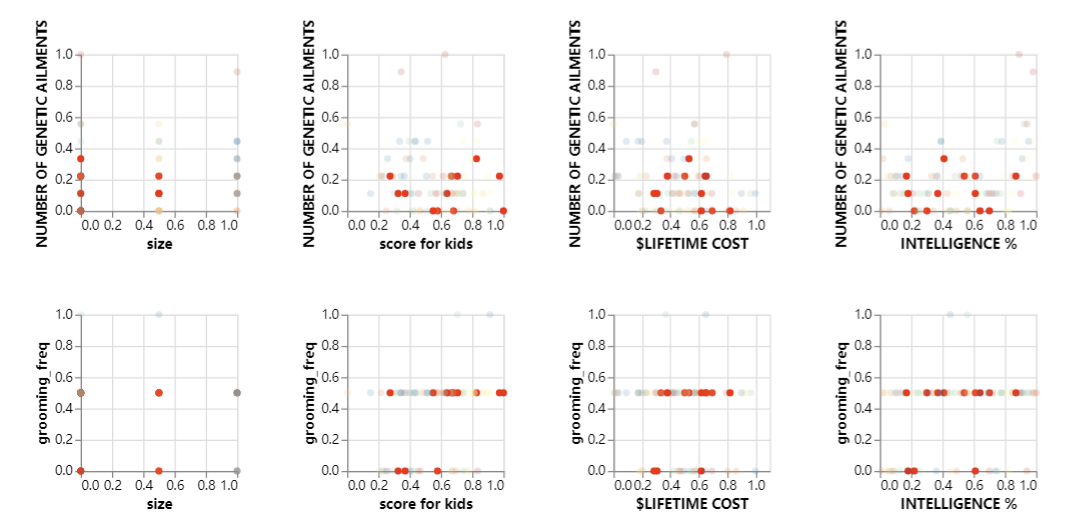

Based on the above chart, we can have the following general impressions for different types of dogs:

|              | size           | score for kids | lifetime cost | intelligence | longevity  | genetic ailments | grooming frequency |
| ------------ | -------------- | -------------- | ------------- | ------------ | ---------- | ---------------- | ------------------ |
| terrier      | small-moderate | diverse        | moderate      | moderate     | moderate   | low              | low                |
| hound        | diverse        | low-medium     | diverse       | diverse      | diverse    | low-medium       | low-medium         |
| non-sporting | medium-large   | diverse        | diverse       | low-medium   | diverse    | medium-high      | low-medium         |
| sporting     | medium-large   | high           | diverse       | medium-high  | medium     | low-medium       | medium             |
| toy          | small          | medium         | low-medium    | diverse      | medium     | low-medium       | low-medium         |
| working      | medium-large   | low-medium     | low-medium    | diverse      | low-medium | low-medium       | medium             |

For example, working dogs generally are large in size but short in longevity (sad). General impressions of different dogs can be obtained from the above table.

Here, the code and visualizations for Goal 1 have been completed. An analyst or an enthusiast can derive a general impressions for different types of dog breeds.

## 5. Goal 2: Recommending dog breed based on numerical scores

Suppose the following assumed weights from a potential owner.

In [13]:
# Defining the weights for each feature.
weights = dict({
    'popularity ranking': -2.0,
    'size': 1.0,
    'score for kids': 1.5,
    '$LIFETIME COST': -1.0,
    'INTELLIGENCE %': 2.0,
    'LONGEVITY(YEARS)': 1.5,
    'NUMBER OF GENETIC AILMENTS': -1.0,
    'grooming_freq': -0.5
})

Calculate scores for each attributes, and obtain weighted scores for each dog breed. Choose top 10 breeds as candidates.

In [14]:
# Calculate the score for each attribute
for col, weight in weights.items():
    df[f'{col}_score'] = df[col] * weight

# Calculate the final weighted score
df['weighted_score'] = df[[f'{col}_score' for col in weights.keys()]].sum(axis=1)

# Select scores for a new dataframe
score_columns = [f'{col}_score' for col in weights.keys()]
new_df = df[['Breed', 'type'] + score_columns + ['weighted_score']]

# Sort the new DataFrame by weighted_score in descending order
new_df = new_df.sort_values(by='weighted_score', ascending=False)

# Sort for the top 10 breeds
top_10_df = new_df.head(10)

To choose the best-fit candidate, the next is to compare the overall and the scores from each attributes. Three steps are involved:

1. Draw a chart to show the overall scores of the top 10 candidates.

2. Draw a chart to show the scores from each attribute.

3. Connect the two charts so that if a specific candidate is selected, its scores from each attribute are clearly shown.

For the Step 2, I need to melt the chart to help to create a stacked bar charts.

In [15]:
# Melt the DataFrame to have a long format suitable for Altair
melted_df = top_10_df.melt(
    id_vars=['Breed'],
    value_vars=[f'{col}_score' for col in weights.keys()],
    var_name='attribute',
    value_name='score'
)

# Rename the attributes for better readability
attribute_mapping = {
    'popularity ranking_score': 'Popularity Ranking',
    'size_score': 'Size',
    'score for kids_score': 'Score for Kids',
    '$LIFETIME COST_score': 'Lifetime Cost',
    'INTELLIGENCE %_score': 'Intelligence',
    'LONGEVITY(YEARS)_score': 'Longevity',
    'NUMBER OF GENETIC AILMENTS_score': 'Genetic Ailments',
    'grooming_freq_score': 'Grooming Frequency'
}

melted_df['attribute'] = melted_df['attribute'].map(attribute_mapping)

Draw two charts and link them together

In [16]:
# Bar chart for the top 10 candidates
dropdown = alt.binding_select(options=top_10_df["Breed"].unique().tolist(), name="Select a dog breed:")
selection = alt.selection_single(fields=['Breed'],  bind=dropdown, empty='all')
# Create a bar chart for the final weighted scores
chart1 = alt.Chart(top_10_df).mark_bar().encode(
    y=alt.Y('Breed', sort='-x'),
    x='weighted_score',
    color='type',
    opacity=alt.condition(selection, alt.value(1),alt.value(.2))
).properties(
    title='Top 10 breed candidates'
).add_selection(selection)

# Creat a bar chart for explicitly shown the attribute contributions
chart2 = alt.Chart(melted_df).mark_bar().encode(
    x=alt.X('Breed', sort='-y'),
    y='score',
    color='attribute',
    tooltip=['Breed', 'attribute', 'score'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).properties(
    title='Contributions from different attributes'
).transform_filter(selection)

# Combine the charts
combined_chart = alt.vconcat(chart1, chart2).resolve_legend(
    color="shared"
)

combined_chart

alt.VConcatChart(...)

For example, if I choose poodle, the overal score and scores from each attributes are highlighted. Also, toolkit is added which could show breed, attribute, contributed score clearly.
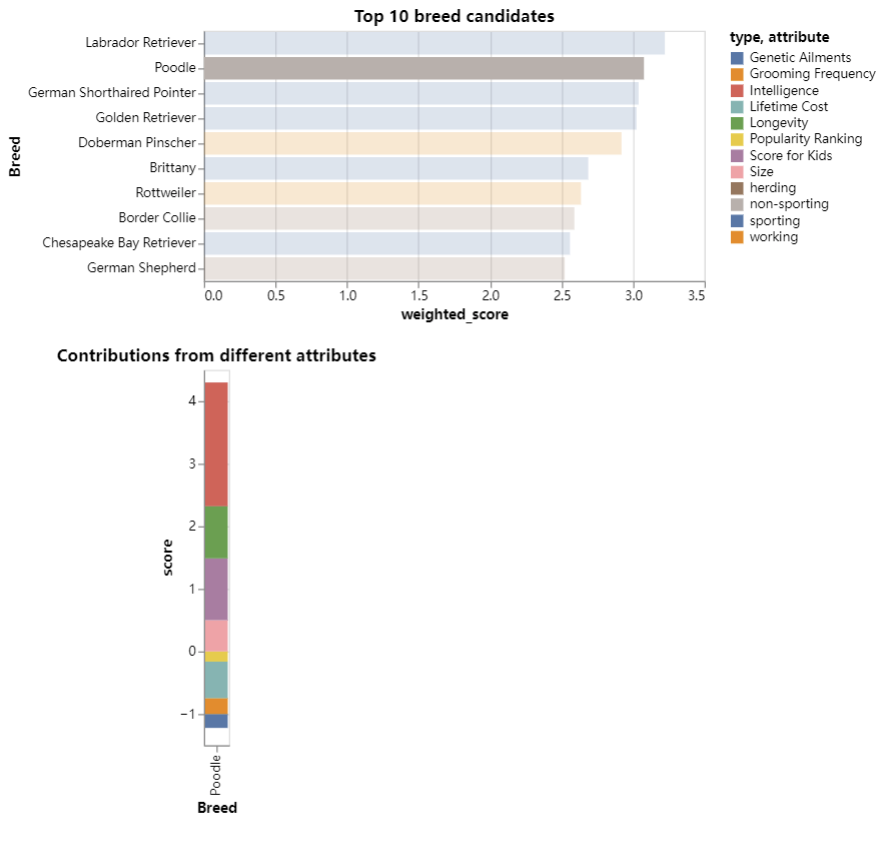

Here, the code and visualizations for Goal 2 have been completed. A potential owner can input her/his perferences, obtain a candidate list, and evaluate trade-offs between different breeds.

## 6. Evaluation

### 6.1 Define the target question
The target question is that how effective the visualization is, which including two aspects:
1. If they could obtain general impressions about a certain types of dogs.
2. Giving their perferences on different attributes, would the selected candidates be suitable?

### 6.2 Recruit participants
To evaluate the visualizations, 3 relatives and neighbours are recruited.
1. A five year old kid who has never owned a dog. He wishes his dog could be his best friend as he grows up.
2. An old lady who wishes her dog could take a walk with her on sunny days.
3. An office worker who could only look after his pet after work.

### 6.3 Determine mesures
The insight depth is used as the determine measures. The visualization is shown to the participants, and then questions about general impressions and personal preferences are asked. Next, their responses are checked and evaluated based on the visualization to determine the accuracy. 

### 6.4 Journaling study
Two questions are asked:
1. The general impressions on one specific type of dog breed, including sporting, toy, and working.
2. Ask their priorities on the attributes. For example, assign intergers ([-5, 5]) as the weights for the attributes, and calculate the candidates. 

### 6.5 Instantiate methods 
Give the participants the above two questions, and collect their feedbacks.

### 6.6 Success criteria
The success criteria include two points:
1. If they can give a basically accurate general impressions on a certain type of dog breed.
2. If the recommendated candidate dog breeds are suitable given their status and preferences.

### 6.7 Results and evaluation
1. My neighbor kid thinks that sproting dogs are smart, friendly to kids, and needs grooming once a week, which is correct based on the data. His main priorities are the attributes including higher "score for kids", "popularity ranking" and intelligence, and lower number of ailments. The top three candidates are Welsh Springer Spaniel, Border Terrier, and English Cocker Spaniel, all of which get along well with children based on general knowledge.

2. The old lady thinks that toy dogs are small, low-cost, and moderate in longevity, which is correct based on the data. Her main priorities are the attributes including smaller size, low cost, and low number of genetic ailments. The top three candidates are Briard, Bouvier des Flandres, Greyhound. They candidates are well known for their gentle, loyal, and calm temperate, which are good choices.

3. The office workder thinks that working dogs are big, but with less longevity and kindness to children, which is a basically correct impressions. However, working dogs can be trained even for rescuing. His main priorities are low-cost, less genetic ailments and high popularity. The top three candidates are Rat-Coated Retriever, Kerry Blue Terrier, and Briand. Based on the general knowledge, Kerry Blue Terrier is quit adaptable and a good fit for office workers. Briard is also suitable if enough engagement and exercise are provided after work. However, Flat-Coated Retriever enjoys being around people and might struggle being left alone. Therefore, the success of the recommendation is partially passed.

At last, based on the results and evaluation, the visualization can give users correct general impressions on different types of dog breeds, and recommend suitable candidates for potential owners. However, recommending dog breeds should consider both the owners' preferences and the dogs' temperament. Hence, more data is still needed to improve the recommending function.

## 7. Conclusion

In this assignment, the fundamental concepts and hands-on practice of data visualization are covered. Starting from a open-source dataset and proper transformation, visualization design, implemention, evaluation are conducted.

The future may lie in enxtending the dataset by adding data relating to dog breeds, and improve the recommending function.